# How To Draw Contours Around Objects Using OpenCV


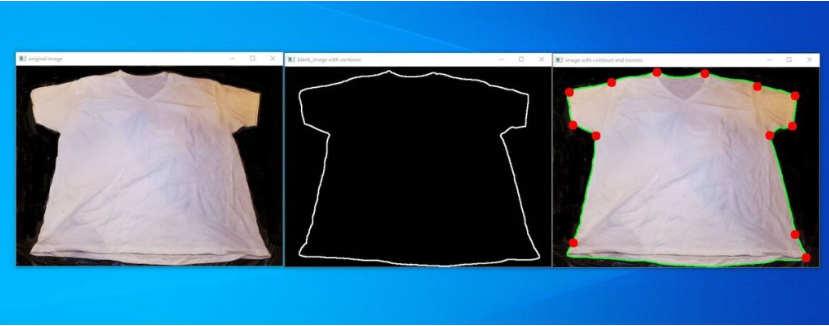

In [ ]:
import cv2 # OpenCV library
import numpy as np # NumPy scientific computing library
import matplotlib.pyplot as plt

In [ ]:
# Read the image
image = cv2.imread("tshirt-1.jpg")

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

60.0


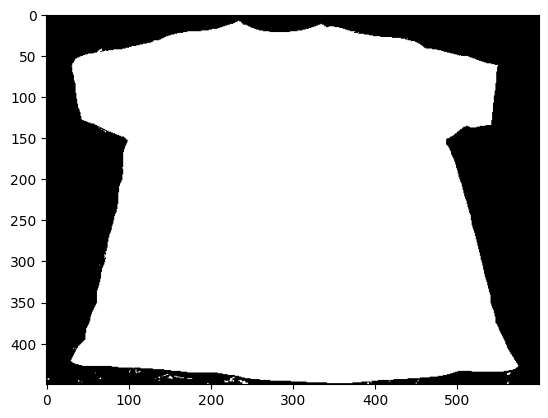

In [ ]:
# Convert the image to black and white.
# Modify the threshold (e.g. 60 for tshirt.jpg) accordingly depending on how to output looks.
# If you have a dark item on a light background, use cv2.THRESH_BINARY_INV and consider 
# changing the lower color threshold to 115.
_,thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)
#thresh = cv2.threshold(gray, 115, 255, cv2.THRESH_BINARY_INV)[1]
 
print(_)
plt.imshow(thresh,cmap='gray')


To apply morphological opening to this binary image using this structuring element, we first slide the structuring element over the binary image and compute the minimum pixel value within the 3x3 neighborhood defined by the kernel at each position. The resulting value is assigned to the center pixel of the kernel's footprint in the output image.

Here's how the operation works for the first pixel in the top-left corner of the binary image:


```
  0  1  0  1  1
  1  0  1  1  0
  0  0  1  1  1
  0  0  1  1  0
  1  0  1  0  0

  1  1  1
  1  1  1
  1  1  1

min(0, 1, 0, 1, 0, 1, 0, 1, 1) = 0

Result:

  0  0  0  1  1
  0  0  0  0  0
  0  0  0  0  0
  0  0  0  0  0
  0  0  0  0  0
```



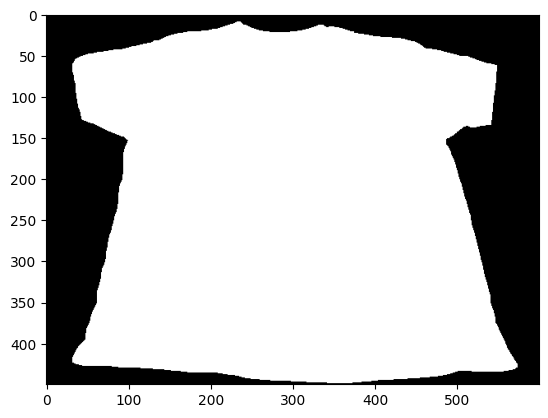

In [ ]:
# Create a kernel (i.e. a small matrix)
kernel = np.ones((5,5),np.uint8)
# Use the kernel to perform morphological opening
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# If you have a dark item on a light background, uncomment this line.
#thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.imshow(thresh,cmap='gray')

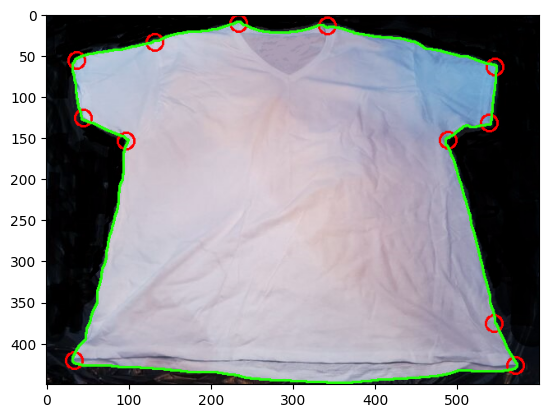

In [ ]:
# Find the contours
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
 
# Create a blank image
blank_image = np.ones((450,600,3), np.uint8)
 
# Set the minimum area for a contour
min_area = 5000
 
# Draw the contours on the original image and the blank image
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        cv2.drawContours(image,[c], 0, (36,255,12), 2)
        cv2.drawContours(blank_image,[c], 0, (255,255,255), 2)


plt.imshow(image)

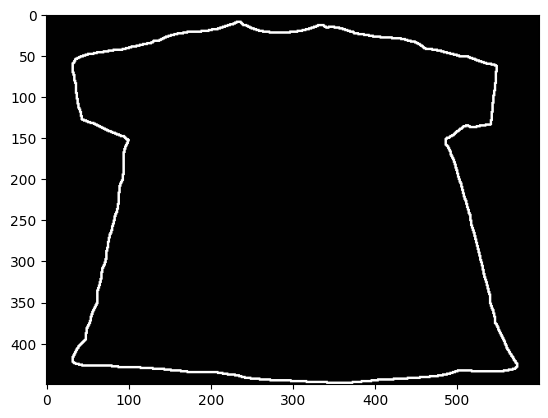

In [ ]:
plt.imshow(blank_image)

(539, 132)
(571, 427)
(97, 154)
(45, 126)
(546, 64)
(489, 153)
(34, 421)
(37, 56)
(342, 14)
(234, 11)
(545, 376)
(132, 34)


True

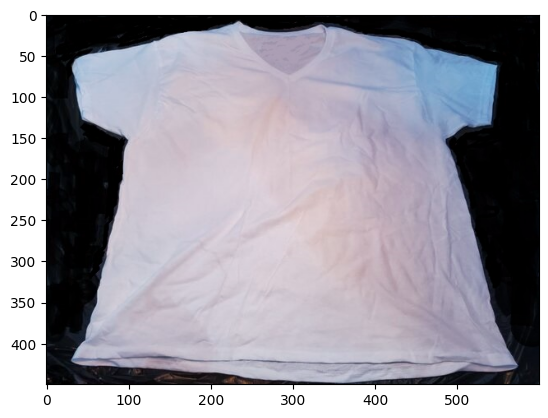

In [ ]:
# Conver the blank image to grayscale for corner detection
gray = cv2.cvtColor(blank_image, cv2.COLOR_BGR2GRAY)
 
# Detect corners using the contours
corners = cv2.goodFeaturesToTrack(image=gray,maxCorners=25,qualityLevel=0.20,minDistance=50) # Determines strong corners on an image
 

  
# Radius of circle to draw on the corners
radius = 10
   
# Blue color in BGR
color = (255, 0, 0)
   
# Line thickness of 2 px
thickness = 2
# Draw the corners on the original image
for corner in corners:
  x,y = corner.ravel()
  # Center coordinates
  center_coordinates =(int(x),int(y))
  print(center_coordinates)
  cv2.circle(image, center_coordinates, radius, color, thickness)
  #cv2.circle(image,(x,y),10,(0,0,255),-1)
 
 # Display the image
image_copy = cv2.imread("tshirt-1.jpg")
plt.imshow(image_copy)


 
# Save the image that has the contours and corners
cv2.imwrite('contour_tshirt.jpg', image)
 
# Save the image that has just the contours
cv2.imwrite('contour_tshirt_blank_image.jpg', blank_image)



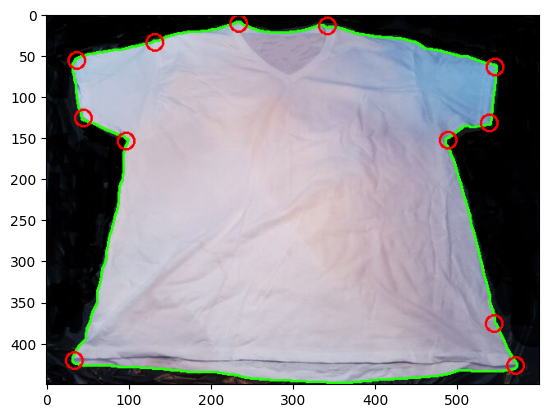

In [ ]:
plt.imshow(image)

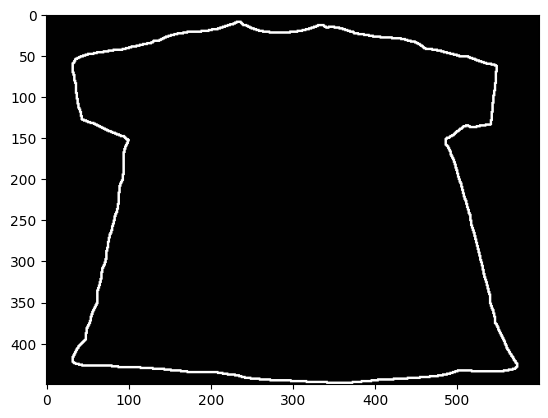

In [ ]:
plt.imshow(blank_image)